# **Electric Field Simulation**

## Prerequisite

To run the simulation, please run the code below.

You might see that as "*1 cell hidden*." Just press the run button.

At first, it takes some time to initialize the environment.



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

class ElectricField :

  def __init__(self, charges, xlim = [-10, 10], ylim = [-10, 10], density = 2, linewidth = 1) :
    charges  =  [(c[0], (c[1], c[2])) for c in charges]
    X = np.linspace(xlim[0], xlim[1], 1000)
    Y = np.linspace(ylim[0], ylim[1], 1000)
    X, Y = np.meshgrid(X, Y)
    self.Electric_Field(X, Y, charges, density = density, linewidth = linewidth)

  
  def E_Field(self, P0, P, Q) :
    k = 8.988 * 10**9
    r = np.sqrt((P[0] - P0[0])**2 + (P[1] - P0[1])**2)
    return k * Q / r**2
  
  def E_Total(self, X, Y, charges) :
    EX, EY = (0, 0)
    for Q, (X0, Y0) in charges :
      E = self.E_Field([X0, Y0], [X, Y], Q)
      angle = np.arctan2(Y - Y0, X - X0)
      EX += E * np.cos(angle)
      EY += E * np.sin(angle)
    return EX, EY
  
  def Electric_Field(self, X, Y, charges, density = 2, linewidth = 1) :
    EX, EY = self.E_Total(X, Y, charges)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111)
    color = 2 * np.log(np.hypot(EX, EY))
    ax.streamplot(X, Y, EX, EY, density = 2, color = color,
                  linewidth = 1, arrowstyle = '->', arrowsize = 1.5)
    sign_color = {True: "#AA0000", False: "#0000AA"}
    for Q, P0 in charges :
      ax.add_artist(Circle(P0, 0.25, color = sign_color[Q > 0]))
    plt.show()

## Simulation

Inside the function **ElectricField()**, you can input the sources in the list form.

\
In the list, each charge should be in the format of [charge $q$ (in coulombs), $x$, $y$]

For example, the source with 1nC at $(5, 3)$ is [1e-9, 5, 3]

\
These are some extra modifications you can make :
- xlim: changes the range of $x$ (default: xlim = [-10, 10])
- ylim: changes the range of $y$ (default: ylim = [-10, 10])
- density: changes the density of the lines (default: density = 2)
- linewidth: changes the width of the lines (default: linewidth = 1)


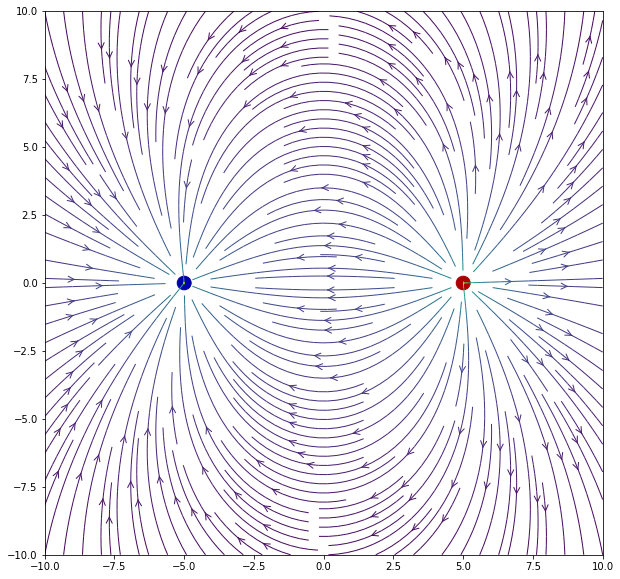

In [25]:
ElectricField([[5e-9, 5, 0], [-5e-9, -5, 0]], density = 8)